In [1]:
#Importam librariile si functiile necesare
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score



In [2]:
#Reading the data from the database
data = pd.read_csv("C:\\Users\\drago\\Desktop\\LSTM\\BazaDeDate\\data2.csv", header=None)

#Using every 30th row of data for faster processing
data = data[0::30]
#data.shape
data.head()

C:\Users\drago\AppData\Local\Temp\ipykernel_11172\1656871233.py:2: DtypeWarning: Columns (1,2,4,5,26,27,34,35,42,43,54,55,84,85,91,92,99,100,107,108,123,124,126,127,129,130,137,138,145,146,153,154,171,172,174,175,177,178,185,186,193,194,201,202,209,210,213,214,217,218,221,222,225,226,236,237,240,241,260,261,264,265,268,269,272,347,348,351,352,355,356,359,360) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\drago\\Desktop\\LSTM\\BazaDeDate\\data2.csv", header=None)


,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
0,2022-09-07 14:17:09,True,False,9.0,True,False,9.0,0.0,1.0,13.596825,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
30,2022-09-07 14:27:25,True,False,9.0,True,False,9.0,0.0,1.0,13.334602,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
60,2022-09-07 14:37:41,True,False,9.0,True,False,9.0,0.0,1.0,13.176361,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
90,2022-09-07 14:47:56,True,False,9.0,True,False,9.0,0.0,1.0,12.877964,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
120,2022-09-07 14:58:11,True,False,9.0,True,False,9.0,0.0,1.0,12.715202,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0


In [3]:
#Replacing all boolean values to 1 or 0 and dropping all null/nan values
data.replace({True: 1, False: 0}, inplace=True)
data = data.dropna()

In [4]:
#Reading the names of each sensor using BeautifulSoup 
%pip install beautifulsoup4
%pip install lxml


#Reading from the XML File
from bs4 import BeautifulSoup
with open('OPCUATagsMeaning_SE_Deta.xml', 'r') as file:
    xml_data = file.read()

bs_data = BeautifulSoup(xml_data, "xml")


#Creating the name lists
steps_list = []
items_list = []
sensors_list = []
columns = []

Items = bs_data.find_all('Item')


for item in Items:
    for sensor in item:
        if sensor.name != None:
            sensors_list.append(sensor.name)
            items_list.append(item.get('name'))
            steps_list.append(item.parent.get('name'))
            
            
 #Dropping the invalid columns
invalid_list = [207,208,274,275,325,330,348,349]

for x in invalid_list:
    sensors_list.remove(sensors_list[x])
    items_list.remove(items_list[x])
    steps_list.remove(steps_list[x])
                
        
#Inserting the time column
sensors_list.insert(0,'Time')
items_list.insert(0,'')
steps_list.insert(0,'')

columns.append(sensors_list[0])

for i in range (1,len(sensors_list)):
        columns.append(steps_list[i] + " | " + items_list[i] + " | " +sensors_list[i])
        
    
print("Number of columns: " + str(len(columns)))


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Number of columns: 461


In [5]:
#Adding the new header 
header = columns
data.columns = header
data.shape
data.head()

,Time,Step 1 | Camin Intrare 1 | Stavila_1_Mod_Automat,Step 1 | Camin Intrare 1 | Stavila_1_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_1_Stare,Step 1 | Camin Intrare 1 | Stavila_2_ModAutomat,Step 1 | Camin Intrare 1 | Stavila_2_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_2_Stare,Step 1 | Camin Intrare 1 | CCOCr_mg_l,Step 1 | Camin Intrare 1 | PO4_mg_l,Step 1 | Camin Intrare 1 | NH4_mg_l,...,Step 6 | Alarme 1 | Word_22,Step 6 | Alarme 1 | Word_23,Step 6 | Alarme 1 | Word_24,Step 6 | Alarme 1 | Word_25,Step 6 | Alarme 1 | Word_26,Step 6 | Alarme 1 | Word_27,Step 6 | Alarme 1 | Word_28,Step 6 | Alarme 1 | Word_29,Step 6 | Alarme 1 | Word_30,Step 6 | Alarme 1 | Word_31
0,2022-09-07 14:17:09,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.596825,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
30,2022-09-07 14:27:25,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.334602,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
60,2022-09-07 14:37:41,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.176361,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
90,2022-09-07 14:47:56,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.877964,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
120,2022-09-07 14:58:11,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.715202,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0


In [6]:
#Replacing the Index of the DataFrame with the Time column
data.index = pd.to_datetime(data["Time"], format='%Y-%m-%d %H:%M:%S')
data.head()

,Time,Step 1 | Camin Intrare 1 | Stavila_1_Mod_Automat,Step 1 | Camin Intrare 1 | Stavila_1_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_1_Stare,Step 1 | Camin Intrare 1 | Stavila_2_ModAutomat,Step 1 | Camin Intrare 1 | Stavila_2_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_2_Stare,Step 1 | Camin Intrare 1 | CCOCr_mg_l,Step 1 | Camin Intrare 1 | PO4_mg_l,Step 1 | Camin Intrare 1 | NH4_mg_l,...,Step 6 | Alarme 1 | Word_22,Step 6 | Alarme 1 | Word_23,Step 6 | Alarme 1 | Word_24,Step 6 | Alarme 1 | Word_25,Step 6 | Alarme 1 | Word_26,Step 6 | Alarme 1 | Word_27,Step 6 | Alarme 1 | Word_28,Step 6 | Alarme 1 | Word_29,Step 6 | Alarme 1 | Word_30,Step 6 | Alarme 1 | Word_31
Time,,,,,,,,,,,,,,,,,,,,,
2022-09-07 14:17:09,2022-09-07 14:17:09,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.596825,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:27:25,2022-09-07 14:27:25,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.334602,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:37:41,2022-09-07 14:37:41,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.176361,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:47:56,2022-09-07 14:47:56,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.877964,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:58:11,2022-09-07 14:58:11,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.715202,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0


In [7]:
#Adding the Seconds column
data['Seconds'] = data.index.map(pd.Timestamp.timestamp)
data.head()

,Time,Step 1 | Camin Intrare 1 | Stavila_1_Mod_Automat,Step 1 | Camin Intrare 1 | Stavila_1_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_1_Stare,Step 1 | Camin Intrare 1 | Stavila_2_ModAutomat,Step 1 | Camin Intrare 1 | Stavila_2_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_2_Stare,Step 1 | Camin Intrare 1 | CCOCr_mg_l,Step 1 | Camin Intrare 1 | PO4_mg_l,Step 1 | Camin Intrare 1 | NH4_mg_l,...,Step 6 | Alarme 1 | Word_23,Step 6 | Alarme 1 | Word_24,Step 6 | Alarme 1 | Word_25,Step 6 | Alarme 1 | Word_26,Step 6 | Alarme 1 | Word_27,Step 6 | Alarme 1 | Word_28,Step 6 | Alarme 1 | Word_29,Step 6 | Alarme 1 | Word_30,Step 6 | Alarme 1 | Word_31,Seconds
Time,,,,,,,,,,,,,,,,,,,,,
2022-09-07 14:17:09,2022-09-07 14:17:09,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.596825,...,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0,1.662560e+09
2022-09-07 14:27:25,2022-09-07 14:27:25,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.334602,...,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0,1.662561e+09
2022-09-07 14:37:41,2022-09-07 14:37:41,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.176361,...,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0,1.662561e+09
2022-09-07 14:47:56,2022-09-07 14:47:56,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.877964,...,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0,1.662562e+09
2022-09-07 14:58:11,2022-09-07 14:58:11,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.715202,...,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0,1.662563e+09


In [8]:
#Creating the timestamps
day = 60*60*24
year = 365.2425 * day

data['Day sin'] = np.sin(data['Seconds'] * (2* np.pi / day))
data['Day cos'] = np.cos(data['Seconds'] * (2* np.pi / day))
data['Year sin'] = np.sin(data['Seconds'] * (2* np.pi / year))
data['Year cos'] = np.cos(data['Seconds'] * (2* np.pi / year))

data.head()

,Time,Step 1 | Camin Intrare 1 | Stavila_1_Mod_Automat,Step 1 | Camin Intrare 1 | Stavila_1_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_1_Stare,Step 1 | Camin Intrare 1 | Stavila_2_ModAutomat,Step 1 | Camin Intrare 1 | Stavila_2_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_2_Stare,Step 1 | Camin Intrare 1 | CCOCr_mg_l,Step 1 | Camin Intrare 1 | PO4_mg_l,Step 1 | Camin Intrare 1 | NH4_mg_l,...,Step 6 | Alarme 1 | Word_27,Step 6 | Alarme 1 | Word_28,Step 6 | Alarme 1 | Word_29,Step 6 | Alarme 1 | Word_30,Step 6 | Alarme 1 | Word_31,Seconds,Day sin,Day cos,Year sin,Year cos
Time,,,,,,,,,,,,,,,,,,,,,
2022-09-07 14:17:09,2022-09-07 14:17:09,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.596825,...,513.0,0.0,0.0,64.0,0.0,1.662560e+09,-0.563346,-0.826221,-0.916342,-0.400396
2022-09-07 14:27:25,2022-09-07 14:27:25,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.334602,...,513.0,0.0,0.0,64.0,0.0,1.662561e+09,-0.599780,-0.800165,-0.916391,-0.400283
2022-09-07 14:37:41,2022-09-07 14:37:41,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,13.176361,...,513.0,0.0,0.0,64.0,0.0,1.662561e+09,-0.635011,-0.772503,-0.916441,-0.400171
2022-09-07 14:47:56,2022-09-07 14:47:56,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.877964,...,513.0,0.0,0.0,64.0,0.0,1.662562e+09,-0.668914,-0.743339,-0.916490,-0.400059
2022-09-07 14:58:11,2022-09-07 14:58:11,1.0,0.0,9.0,1.0,0.0,9.0,0.0,1.0,12.715202,...,513.0,0.0,0.0,64.0,0.0,1.662563e+09,-0.701480,-0.712690,-0.916539,-0.399946


In [9]:
#Droping the Seconds column and repositioning the timestamps
data = data.drop('Seconds', axis=1)
data = data.drop('Time', axis=1)

columns = data.columns.tolist()
columns = columns[-4:] + columns[:-4]

data = data[columns]

data.head()

,Day sin,Day cos,Year sin,Year cos,Step 1 | Camin Intrare 1 | Stavila_1_Mod_Automat,Step 1 | Camin Intrare 1 | Stavila_1_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_1_Stare,Step 1 | Camin Intrare 1 | Stavila_2_ModAutomat,Step 1 | Camin Intrare 1 | Stavila_2_Comanda_Distanta,Step 1 | Camin Intrare 1 | Stavila_2_Stare,...,Step 6 | Alarme 1 | Word_22,Step 6 | Alarme 1 | Word_23,Step 6 | Alarme 1 | Word_24,Step 6 | Alarme 1 | Word_25,Step 6 | Alarme 1 | Word_26,Step 6 | Alarme 1 | Word_27,Step 6 | Alarme 1 | Word_28,Step 6 | Alarme 1 | Word_29,Step 6 | Alarme 1 | Word_30,Step 6 | Alarme 1 | Word_31
Time,,,,,,,,,,,,,,,,,,,,,
2022-09-07 14:17:09,-0.563346,-0.826221,-0.916342,-0.400396,1.0,0.0,9.0,1.0,0.0,9.0,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:27:25,-0.599780,-0.800165,-0.916391,-0.400283,1.0,0.0,9.0,1.0,0.0,9.0,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:37:41,-0.635011,-0.772503,-0.916441,-0.400171,1.0,0.0,9.0,1.0,0.0,9.0,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:47:56,-0.668914,-0.743339,-0.916490,-0.400059,1.0,0.0,9.0,1.0,0.0,9.0,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0
2022-09-07 14:58:11,-0.701480,-0.712690,-0.916539,-0.399946,1.0,0.0,9.0,1.0,0.0,9.0,...,6.0,4.0,4.0,1028.0,0.0,513.0,0.0,0.0,64.0,0.0


In [10]:
#Structuring the data 
def data_to_X_y2(data,step,timesteps=100,outsteps=100):
    
    #Preparing the data
    input_data = data.copy()
    output_data = data.copy()
     
    columns_to_keep = [ 
                        "Step 4 | Reactor Biologic 1 | Debit_Stabilizare_Namol",
                        "Step 4 | Reactor Biologic 1 | Volum_Stabilizare_Namol",
                      ]
    
    columns_to_delete_input = [
        "Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Ore_Functionare",
    ]

    for column in input_data:
        if step not in column and column not in columns_to_keep:
            columns_to_delete_input.append(column)

    input_data.drop(columns=columns_to_delete_input, inplace=True)
    


    columns_to_delete_output = []
    
    for column in output_data:
        if step not in column or ("Stare" not in column and "Avarie" not in column):
            columns_to_delete_output.append(column)

    output_data.drop(columns=columns_to_delete_output, inplace=True)
    
    
    i_columns = input_data.columns
    o_columns = output_data.columns
    
    input_data = input_data.to_numpy()
    output_data = output_data.to_numpy()
    
    #Creating X and y
    X = []
    y = []


    for i in range(len(input_data) - timesteps - outsteps):
        row = [r for r in input_data[i:i+timesteps]]
        X.append(row)

        label = output_data[i + timesteps + outsteps]
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X,y,i_columns,o_columns

    

In [11]:
for column in data:
    if "Step 4 | Reactor Biologic 1 |" in column:
        print(column)

Step 4 | Reactor Biologic 1 | Oxigen_mg_per_l
Step 4 | Reactor Biologic 1 | Oxigen_mg_per_l
Step 4 | Reactor Biologic 1 | MTS_mg_per_l
Step 4 | Reactor Biologic 1 | NH4_mg_per_l
Step 4 | Reactor Biologic 1 | NO3_mg_per_l
Step 4 | Reactor Biologic 1 | Redox_mV
Step 4 | Reactor Biologic 1 | Temperatura
Step 4 | Reactor Biologic 1 | Debit_Stabilizare_Namol
Step 4 | Reactor Biologic 1 | Volum_Stabilizare_Namol
Step 4 | Reactor Biologic 1 | Nivel_Actual_Reactor_Biologic
Step 4 | Reactor Biologic 1 | Mixer_Omogenizare_Mod_Automat
Step 4 | Reactor Biologic 1 | Mixer_Omogenizare_Comanda_Dist
Step 4 | Reactor Biologic 1 | Mixer_Omogenizare_Ore_Function
Step 4 | Reactor Biologic 1 | Extractor_Mobil_Mod_Automat
Step 4 | Reactor Biologic 1 | Extractor_Mobil_Comanda_Distan
Step 4 | Reactor Biologic 1 | Pompa_1_Alimentare_Stare
Step 4 | Reactor Biologic 1 | Pompa_1_Alimentare_Mod_Automat
Step 4 | Reactor Biologic 1 | Pompa_1_Alimentare_ComandaDist
Step 4 | Reactor Biologic 1 | Pompa_1_Alimentare_Ore

In [12]:
timesteps2 = 30
outsteps2 = 30


X2,y2,i_columns2,o_columns2 = data_to_X_y2(data,"Step 4 | Reactor Biologic 1 | Pompa_1_Namol",timesteps=timesteps2,outsteps=outsteps2)
X2.shape , y2.shape

((34917, 30, 9), (34917, 1))

In [13]:
#Coloanele folosite la intrare
print("Intrare:\n", i_columns2.values)

#Coloanele folosite la iesire
print("\nIesire:\n", o_columns2.values)

Intrare:
 ['Step 4 | Reactor Biologic 1 | Debit_Stabilizare_Namol'
 'Step 4 | Reactor Biologic 1 | Volum_Stabilizare_Namol'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Stare'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Mod_Automat'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Comanda_Distanta'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Frecventa_Hz'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Putere_kW'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Curent_Motor_A'
 'Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Contor_Energ_kWh']

Iesire:
 ['Step 4 | Reactor Biologic 1 | Pompa_1_Namol_Stare']


In [14]:

#Splittind the new data into Train | Test | Validate data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, shuffle=False)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.1, shuffle=False)
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape, X2_val.shape, y2_val.shape



((21996, 30, 9),
 (21996, 1),
 (10476, 30, 9),
 (10476, 1),
 (2445, 30, 9),
 (2445, 1))

In [15]:
#Building the LSTM Model
nr_inputs2 = X2_train.shape[2]
nr_outputs2 = y2_train.shape[1]

'''
model2 = Sequential()
model2.add(InputLayer((timesteps2, nr_inputs2)))
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(64))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(nr_outputs2, activation='linear'))
'''

model2 = Sequential()
model2.add(InputLayer((timesteps2, nr_inputs2)))
model2.add(LSTM(64))
model2.add(Dense(8,'relu'))
model2.add(Dense(nr_outputs2,'linear'))






model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18944     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 19,473
Trainable params: 19,473
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Creating a checkpoint and compilling
#cp = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [17]:
#import absl.logging
#absl.logging.set_verbosity(absl.logging.ERROR)

#Training the model
model2.fit(X2_train,y2_train, validation_data = (X2_val, y2_val),batch_size=32, epochs=10)

Epoch 1/10
688/688 [==============================] - 17s 18ms/step - loss: 0.1640 - accuracy: 0.0281 - val_loss: 0.1294 - val_accuracy: 0.0540
Epoch 2/10
688/688 [==============================] - 10s 14ms/step - loss: 0.0888 - accuracy: 0.0284 - val_loss: 0.1344 - val_accuracy: 0.0540
Epoch 3/10
688/688 [==============================] - 15s 22ms/step - loss: 0.0860 - accuracy: 0.0284 - val_loss: 0.1226 - val_accuracy: 0.0540
Epoch 4/10
688/688 [==============================] - 15s 21ms/step - loss: 0.0841 - accuracy: 0.0284 - val_loss: 0.1233 - val_accuracy: 0.0540
Epoch 5/10
688/688 [==============================] - 17s 24ms/step - loss: 0.0830 - accuracy: 0.0284 - val_loss: 0.1229 - val_accuracy: 0.0540
Epoch 6/10
688/688 [==============================] - 10s 14ms/step - loss: 0.0808 - accuracy: 0.0284 - val_loss: 0.1205 - val_accuracy: 0.0540
Epoch 7/10
688/688 [==============================] - 11s 16ms/step - loss: 0.0805 - accuracy: 0.0284 - val_loss: 0.1198 - val_accuracy:

328/328 [==============================] - 4s 9ms/step


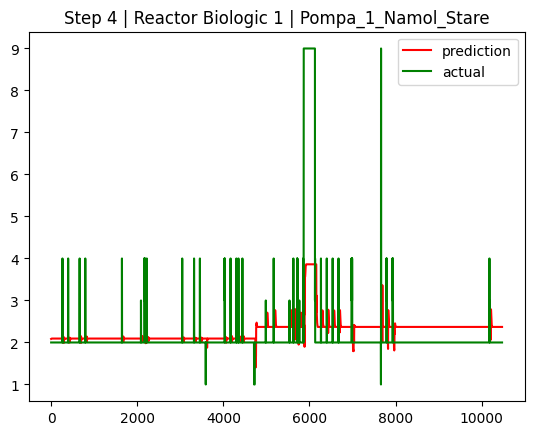

In [18]:
predictions2 = model2.predict(X2_test)
actuals2 = y2_test

pred_df2 = pd.DataFrame(predictions2)
actuals_df2 = pd.DataFrame(actuals2)

pred_df2.columns = o_columns2
actuals_df2.columns = o_columns2

for i in o_columns2:
    plt.plot(pred_df2[i], color='red', label='prediction')
    plt.plot(actuals_df2[i], color='green', label='actual')
    plt.title(i)
    plt.legend()
    plt.show()

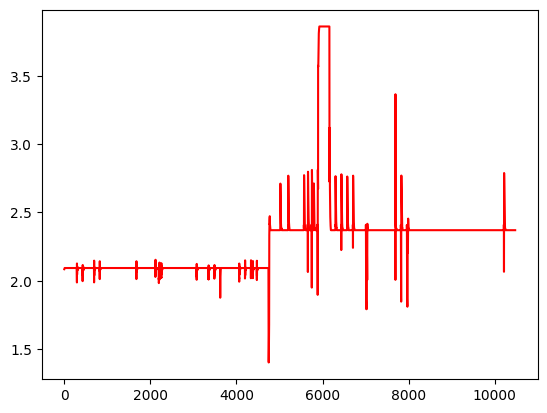

In [19]:
plt.plot(pred_df2[o_columns2], color='red', label='prediction')

In [20]:
predictions2.min()

1.4021709

In [21]:
data.shape

(34977, 470)

In [22]:
rounded_predictions = np.around(predictions2).astype(int)

correct_predictions = np.sum(rounded_predictions == actuals2)

accuracy = correct_predictions / len(predictions2)

print("Model accuracy: ", float("{:.5f}".format(accuracy)) * 100, "%")


Model accuracy:  93.843 %


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def calculate_accuracy(actuals, predictions):
    assert len(actuals) == len(predictions)

    r2 = r2_score(actuals, predictions)

    return r2

r2 = calculate_accuracy(actuals2, predictions2)

print("Model accuracy: ", float("{:.5f}".format(r2)) * 100, "%")


Model accuracy:  32.037 %


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(actuals2, np.round(predictions2))

0.9384306987399771

In [28]:
model = 1
X_newData = 1
y_newData = 1

contor = 0

model.load_weights('model.h5')

predictions = model.predict(X_newData)

model.layers[contor].trainable = False

model.fit(X_newData, y_newData, epochs=5)

contor = contor + 1

model.save_weights('model.h5')


328/328 [==============================] - 2s 5ms/step


In [29]:

model2.layers[0].trainable = False  


model2.fit(X_newData, y_newData, epochs=5)

# Step 6: Evaluate Performance
loss, accuracy = model2.evaluate(X2_test, y2_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

NameError: name 'X_newData' is not defined

328/328 [==============================] - 2s 7ms/step


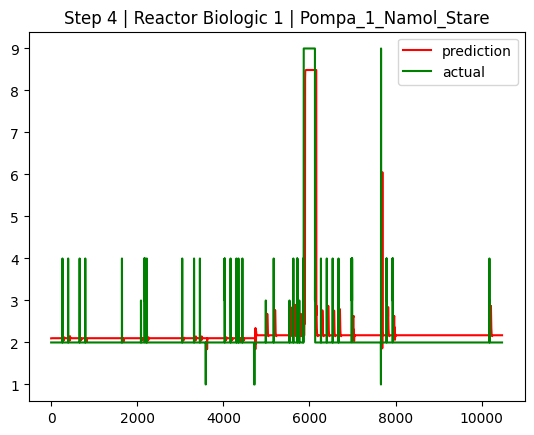

In [26]:
predictions2 = model2.predict(X2_test)
actuals2 = y2_test

pred_df2 = pd.DataFrame(predictions2)
actuals_df2 = pd.DataFrame(actuals2)

pred_df2.columns = o_columns2
actuals_df2.columns = o_columns2

for i in o_columns2:
    plt.plot(pred_df2[i], color='red', label='prediction')
    plt.plot(actuals_df2[i], color='green', label='actual')
    plt.title(i)
    plt.legend()
    plt.show()